In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()
# 是一个 matplotlib 函数，它注册了一些自定义转换器，使得在使用 matplotlib 绘图库进行时间序列数据可视化时更加方便。
#具体来说，它可以自动将 Pandas 中的时间戳转换为 matplotlib 可以理解的格式。
#在使用 matplotlib 绘制时间序列数据时，如果不先注册这些转换器，可能会出现绘图不完整或格式错误等问题。

# Ice Cream Production Data

In [3]:
#read data
df_ice_cream = pd.read_csv('ice_cream.csv')

In [4]:
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [5]:
#rename columns to something more understandable
df_ice_cream.rename(columns={'DATE':'date', 'IPN31152N':'production'}, inplace=True)

In [7]:
df_ice_cream

,date,production
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636
...,...,...
572,2019-09-01,100.1741
573,2019-10-01,90.1684
574,2019-11-01,79.7223
575,2019-12-01,75.7094


In [8]:
#convert date column to datetime type
df_ice_cream['date'] = pd.to_datetime(df_ice_cream.date)

In [9]:
#set date as index
df_ice_cream.set_index('date', inplace=True)

In [10]:
df_ice_cream

,production
date,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-09-01,100.1741
2019-10-01,90.1684
2019-11-01,79.7223


In [11]:
#just get data from 2010 onwards
start_date = pd.to_datetime('2010-01-01')
df_ice_cream = df_ice_cream[start_date:]

In [12]:
#show result
df_ice_cream.head()

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


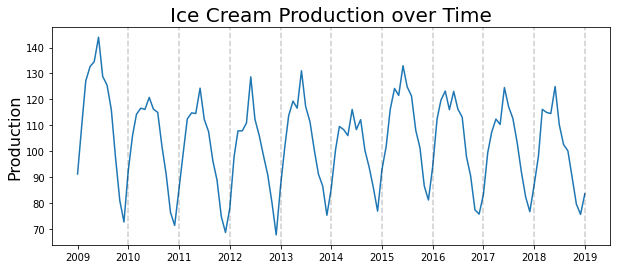

In [13]:
plt.figure(figsize=(10,4))
plt.plot(df_ice_cream.production)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

# ACF

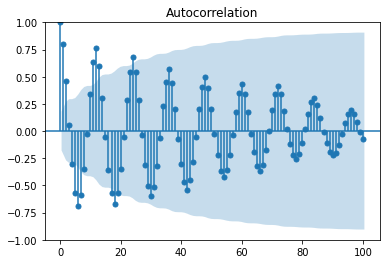

In [14]:
acf_plot = plot_acf(df_ice_cream.production, lags=100)

## Based on decaying ACF, we are likely dealing with an Auto Regressive process

# PACF

/root/miniconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


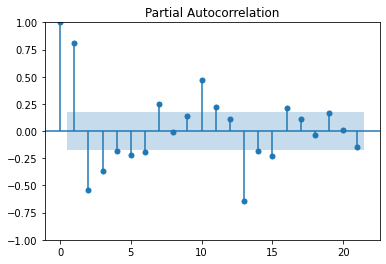

In [15]:
pacf_plot = plot_pacf(df_ice_cream.production)

我们应该从具有滞后1、2、3、10、13的自回归模型开始。PACF（部分自相关函数）可以帮助确定时间序列数据中需要多少滞后。在此过程中，首先通过对数据进行一阶差分、取对数等方法来移除趋势和季节性，然后可以利用PACF和ACF（自相关函数）图来确定适当的自回归和移动平均参数。PACF和ACF都是用于时间序列分析和预测的重要工具。

## Based on PACF, we should start with an Auto Regressive model with lags 1, 2, 3, 10, 13

In [16]:
import yfinance as yf

In [17]:
#define the ticker symbol
tickerSymbol = 'SPY'

In [18]:
#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

In [19]:
#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2015-1-1', end='2020-1-1')

Failed to get ticker 'SPY' reason: Expecting value: line 1 column 1 (char 0)
- SPY: No data found for this date range, symbol may be delisted


In [20]:
tickerDf = tickerDf[['Close']]

In [21]:
#see your data
tickerDf.head()

,Close
Date,


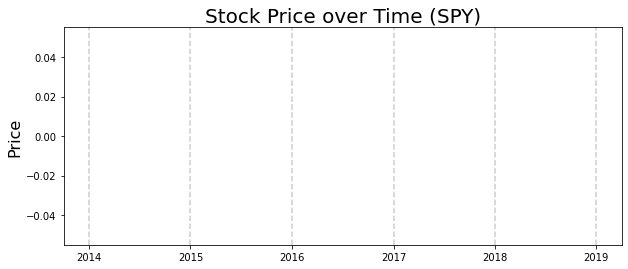

In [22]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.Close)
plt.title('Stock Price over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

## Stationarity: take first difference of this series

In [19]:
#take first difference
first_diffs = tickerDf.Close.values[1:] - tickerDf.Close.values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])

In [20]:
#set first difference as variable in dataframe
tickerDf['FirstDifference'] = first_diffs

In [21]:
tickerDf.head()

,Close,FirstDifference
Date,,
2015-01-02,186.16,-3.36
2015-01-05,182.80,-1.72
2015-01-06,181.08,2.25
2015-01-07,183.33,3.26
2015-01-08,186.59,-1.50


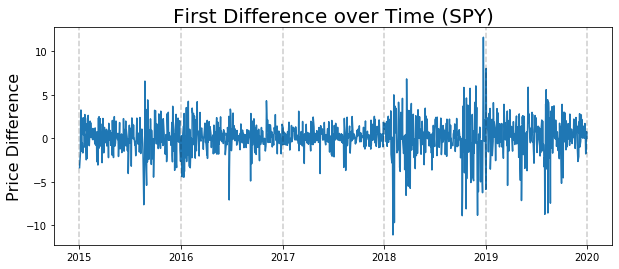

In [22]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.FirstDifference)
plt.title('First Difference over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)